# SLR BY SEITUWA TAMARAUKURO DOMININC

- Mathematics
- Statistics
- Computer Science
- Domain Knowledge

## What is Simple Lineaer Regression?

SLR is statistical method for understanding the relationship between two continous varibles.

**y = mx + c**

y = response variable, dependent variable

x = predictor variable, independent variable

m = slope or coefficient.

c = intercept

## Education Domain 
## Predicting learners scores

In [1]:
# import our libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("student_exam_scores_large.csv")

df.shape

(200, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hours_Studied    200 non-null    float64
 1   Attendance_Rate  200 non-null    float64
 2   Exam_Score       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [5]:
df.head()

,Hours_Studied,Attendance_Rate,Exam_Score
0,5.6,88.4,53.7
1,2.9,99.1,45.3
2,6.5,85.9,62.4
3,6.9,91.4,59.9
4,1.1,64.5,27.4


In [6]:
df.describe()

,Hours_Studied,Attendance_Rate,Exam_Score
count,200.000000,200.000000,200.000000
mean,4.937500,84.864500,49.801000
std,1.750389,9.550984,10.132147
min,1.000000,59.300000,26.200000
25%,3.700000,78.000000,41.975000
50%,4.900000,85.600000,50.100000
75%,6.100000,91.400000,56.800000
max,10.000000,100.000000,75.000000


## Problem statement

We want to predict leaners scores using hours studied or attendance rate

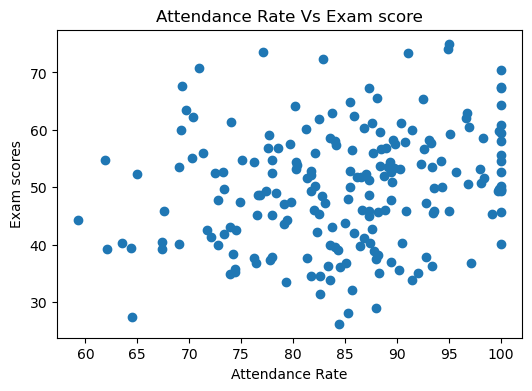

In [8]:
# Creates a template for the scatter plot
plt.figure(figsize=(6, 4))
# Assign x axis, y axis, label the axis and also put up a title
plt.scatter(df['Attendance_Rate'], df['Exam_Score'])
plt.title("Attendance Rate Vs Exam score")
plt.xlabel('Attendance Rate')
plt.ylabel('Exam scores')
plt.show()

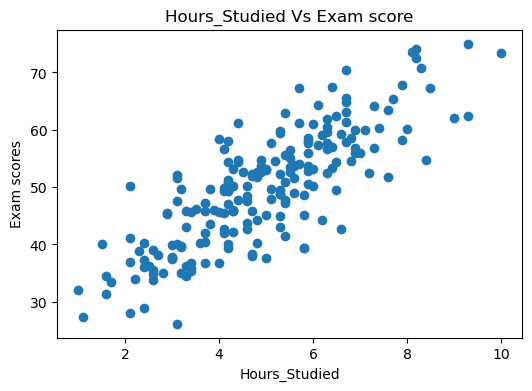

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title("Hours_Studied Vs Exam score")
plt.xlabel('Hours_Studied')
plt.ylabel('Exam scores')
plt.show()

In [10]:
df.corr()['Exam_Score']

Hours_Studied      0.814611
Attendance_Rate    0.217725
Exam_Score         1.000000
Name: Exam_Score, dtype: float64

In [12]:
pearsonr(df['Hours_Studied'], df['Exam_Score'])

PearsonRResult(statistic=0.8146114441941504, pvalue=1.001854612504006e-48)

In [13]:
pearsonr(df['Hours_Studied'], df['Exam_Score'])[0]

0.8146114441941504

In [14]:
pearsonr(df['Hours_Studied'], df['Exam_Score'])[1]

1.001854612504006e-48

In [15]:
pearsonr(df['Attendance_Rate'], df['Exam_Score'])

PearsonRResult(statistic=0.2177250619350894, pvalue=0.001954654978569046)

### Fit a linear regression model

In [16]:
# instantiate the Linear model
lr_model = LinearRegression()

In [ ]:

# X = df[['Hours_Studied']]

In [17]:
X = df['Hours_Studied'].values.reshape(-1, 1)
y = df['Exam_Score']

In [18]:
lr_model.fit(X, y)

LinearRegression()

In [ ]:
y = mx + c

In [23]:
lr_model.predict([[7.4]])

array([61.41263963])

In [24]:
m = lr_model.coef_[0]
m

4.715386649773355

In [25]:
c= lr_model.intercept_
c

26.518778416744066

In [26]:
m * 4.5 + c

47.73801834072417

In [27]:
df[['Hours_Studied', 'Exam_Score']]

,Hours_Studied,Exam_Score
0,5.6,53.7
1,2.9,45.3
2,6.5,62.4
3,6.9,59.9
4,1.1,27.4
...,...,...
195,3.2,39.8
196,6.3,56.6
197,4.2,51.3
198,5.0,53.2


In [28]:
y_pred = lr_model.predict(X)

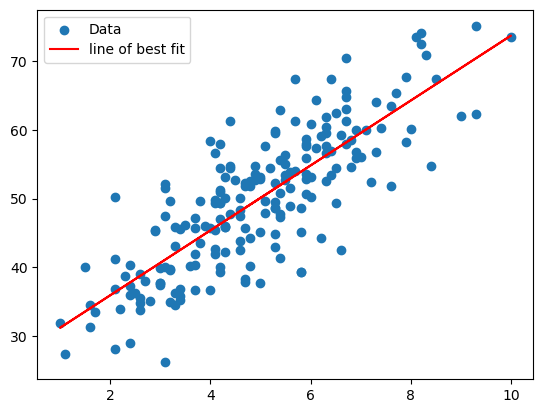

In [29]:
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='line of best fit')
plt.legend()
plt.show()

In [30]:
lr_model.predict([[4]])

array([45.38032502])

### Train test split

In [31]:
df.head()

,Hours_Studied,Attendance_Rate,Exam_Score
0,5.6,88.4,53.7
1,2.9,99.1,45.3
2,6.5,85.9,62.4
3,6.9,91.4,59.9
4,1.1,64.5,27.4


In [32]:
X = df[['Hours_Studied']]
y = df['Exam_Score']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# lets fit and train our model with the training data

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# predict on both the train and test data

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [36]:
def evaluate_model(y_true, y_pred):
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    return r2, mae, mse, rmse

In [37]:
# evaluate the model on the training data

evaluate_model(y_train, y_train_pred)

(0.6593179866868724, 4.646334477112401, 34.20235219339493, 5.848277711719488)

In [38]:
# evaluate the model on the test data
evaluate_model(y_test, y_test_pred)

(0.6752906629968907, 4.704394453850044, 35.110396458574755, 5.92540264105105)

### Residual Analysis

In [39]:
residuals = y_test - y_test_pred

<Axes: xlabel='Exam_Score', ylabel='Count'>

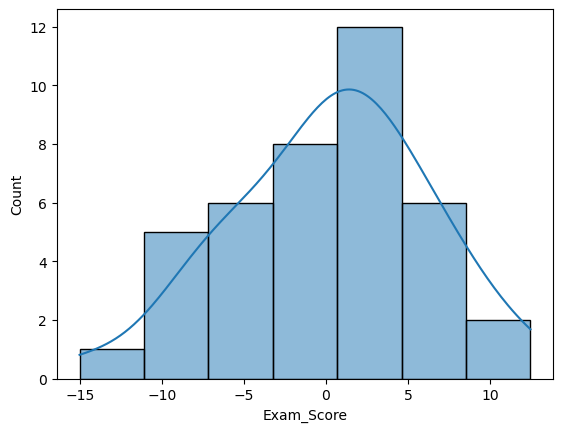

In [40]:
sns.histplot(residuals, kde=True)

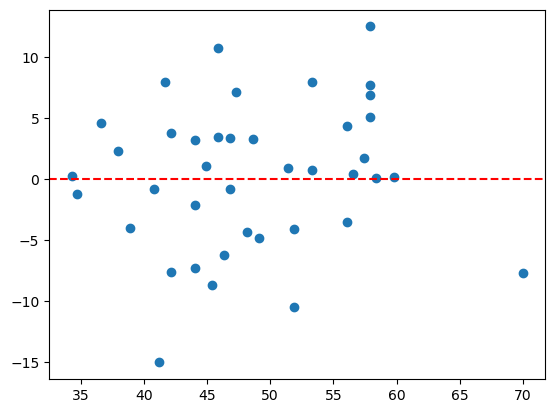

In [41]:
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()